# Social network analysis project: Political blogs network
<h3> Carucci Matteo</h3>

<p style="font-size: 16px" font-family="sans-serif"> In the code below, we prepare our dataset by extracting relevant information from the csv file containing all pair of nodes.
It is easy to see how networkx buikt-in function works. The dataset is read and a list is made: every element i is a tuple.
The network is composed of 20249 nodes and 19025 edges where nodes represent political blogs in 2005 US elections and edges indicate an hyperlink connection between them. The hyperlink represents a reference from one blog to another, that is, in a pair (x,y) the first has cited the second. </p>

In [2]:
import csv
import networkx as nx
import random 
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
lst = []

with open('Politicalnetwork.csv', newline='') as pol_net:
    reader = csv.reader(pol_net)
    for row in reader:
        for x in row:
            x = x.split(' ')
            if 'ï»¿' in x[0]:
                tr = x[0]
                tr = tr[3:]
                lst.append((int(tr), int(x[1])))
                
            else:
                x[0], x[1] = int(x[0]), int(x[1])
                lst.append((x[0],x[1]))
    
    G = nx.DiGraph()             #creating a directed empty graph
    G.add_edges_from(lst)        #populating the graph
    G.add_nodes_from(lst)  
    

### Week 1 - Drawing the Graph

<br>
<p style="font-size: 15px" font-family="sans-serif">We now try to draw the huge graph we have, there are over 20000 nodes in it. As one can see from the graph below, there are some isolated nodes and they probably have not referred or been referred by anyone, they can be secondary blogs who do not have particular influence in the network; in particular the number of edges (hyperlinks between blogs) is less them the number of nodes (20249 nodes and 19025 edges). It is also highly likely that this graph is split in two parts, one where democrats are present (blogs which support the democrats) and one for the conservatives. </p>

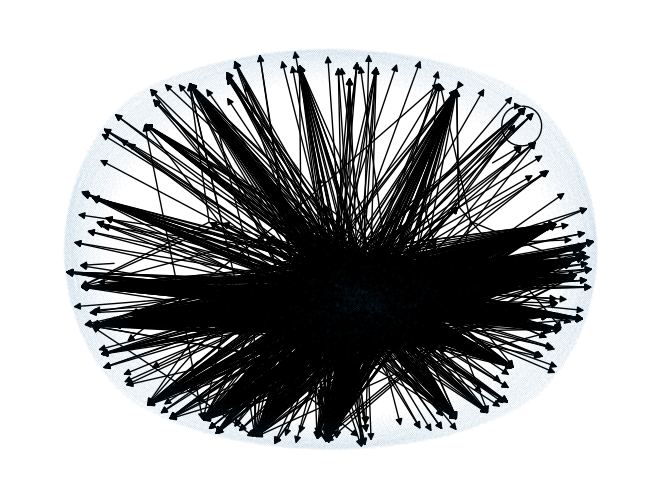

In [6]:
nx.draw(G, node_size = 0.001)   #do not run, takes 20 minutes

<i style ="font-size: 15px">The whole graph looks quite dense in the middle. By looking at it, we can notice that there's a significant number of nodes which point to irrelevant blogs, hence what we are going to focus on, is essentially the core part. </i>
<hr width="300" align="left"/>

### Week 2 - Small World

<p style="font-size: 16px" font-family="sans-serif">As requested, we find some important metrics which will tell us a little more about the graph structure. First off, we find out that some metrics cannot be assessed ( the graph is not connected).
The easiest thing to do is to create functions that can be always used for appropriate smaller networks. </p>

In [2]:
#computing density and other metrics
    
def density(G):
    #mtx = nx.adjacency_matrix(G)
    #n = G.number_of_nodes()
    #m = mtx.sum()     #sum of all degrees        
    
    #d = m//(n*(n-1))             #since it is directed graph, I don't have to divide by 2
        
    
    #in my network, the density can be easily obtained with:
    den = nx.density(G)
    return den
    
 
        
    #average degree = sum of all adjacency matrix numbers/ number of nodes

def av_degree(G):
    s = 0
    n = G.number_of_nodes()
    for x in G.nodes():
        s += G.degree(x)   #or alternatively, av_d = density(G)* G.number_of_nodes() 
        
    av_d = s/n
    return av_d

    
def diameter(G):
    diam = nx.diameter(G)
    return diam      #infinite since the graph is disconnected and not weakly connected! Political blogs are not related rather they are clustered!

# x = diameter(G)
    
def av_distance(G):   #aka Average path length
    avs = nx.average_shortest_path_length(G)
    print(f"The average distance in the graph is: {avs}")
    return avs   #does not return it, since the graph as we said is not weakly connected! We need to find its components 

#av_distance(G)

#to compute the average clustering we first of all need to compute the clustering for each node
def clustering(G,i):
    k = G.degree[i] 
       
    # If k=0 or k=1, then the clustering is 0 otherwise 
    
    if k==0 or k==1:
        Result=0
    else:
        A = nx.adjacency_matrix(G)
        A3 = A**3
        triangle = A3[i,i]/2
    
    
        den=k*(k-1)/2 # number of maximal triangles at u
        
        Result = triangle/den
    
    return Result

#for i in G.nodes():      #check clustering for each node
    #clustering(G,i)


def average_clustering(G):
    N=G.number_of_nodes()    
    S = 0  
    for i in range(N):  # go over the nodes
        S += clustering(G,i) # Add the clustering of the node
    
    Result= S/N 
    
    return Result 

#average_clustering(G)

    

<p style="font-size: 16px" font-family="sans-serif">
We found out that some metrics cannot be computed since both our graph and some randomly generated subgraphs are not weakly connected (majority of cases). What we can do instead, is find the largest components in the network so that we can study them carefully.
We will use some networkx functions to do so; essentially nx.strongly_connected components returns all the strongly connected components of our network but we're only interested in the largest one which can be found, after sorting the generator, by selecting the max of all. What we notice is that there's only one major component which is likely made up of democrats or conservatives blogs only (may be). One other assumption is that there also exist some hyperlinks between them and they might be at the very centre of the graph. Even though we have no direct information of this hypothesis, is it likely that there are some pairs, namely (d,c) such that d(emocrats blog) point to c(onservatives blog). </p>

In [3]:

#print(sum(nx.connected_components(G)))    
#G_maincom = G.subgraph(largest_c)    #takes a subgraph of the largest connected component
G_weakcom = G.subgraph(max(nx.weakly_connected_components(G), key=len))
print('number of nodes in the largest weakly connected graph is:', len(max(nx.weakly_connected_components(G), key=len)))   
 #(made of 1222 nodes) this simply shows the largest strongly component as well as the weakly component

print('number of nodes in the largest strongly component graph is:', len(max(nx.strongly_connected_components(G),key=len)))
 #this is made up of 793 elements!!!       
G_strcom = G.subgraph(max(nx.strongly_connected_components(G), key=len)) 
    #ans = nx.is_connected(G_maincom)    #is it connected?
    #print(ans)

#nx.draw_circular(G_weakcom, with_labels=True, node_size= 0.001)
#nx.draw_circular(G_strcom , with_labels=False, node_size= 0.00001)
#nx.draw(G_strcom, node_size =0.0001)

#first 11 largest strongly connected components
for i in range(11):
    c = 0
    str_sort = sorted(nx.strongly_connected_components(G), key=len, reverse=True)
    print('Elements in the', str(i)+'th','component is', len(str_sort[i]))          #we see that there is only 1 big weakly connected component(1222 elements), and one made of 2 elements
                                                                                    # regarding the strongly connected components, there is a big one(793 nodes), and 9 which only have 2 nodes.
largest_network = str_sort[0]          #this is the largest component in our network.   
    
# first 11 largest weakly connected component
for i in range(11):
    c = 0
    str_sort2 = sorted(nx.weakly_connected_components(G), key=len, reverse=True)
    #print('Elements in the', str(i)+'th','component is', len(str_sort[i]))          #we see that there is only 1 big weakly connected component(1222 elements), and one made of 2 elements
                                                                                    # regarding the strongly connected components, there is a big one(793 nodes), and 9 which only have 2 nodes.
largest_network2 = str_sort2[0]          #this is the largest component in or network.   
    


number of nodes in the largest weakly connected graph is: 1222
number of nodes in the largest strongly component graph is: 793
Elements in the 0th component is 793
Elements in the 1th component is 3
Elements in the 2th component is 2
Elements in the 3th component is 2
Elements in the 4th component is 2
Elements in the 5th component is 2
Elements in the 6th component is 2
Elements in the 7th component is 2
Elements in the 8th component is 2
Elements in the 9th component is 2
Elements in the 10th component is 1


<hr width='300' align='left' />
<p style="font-size: 16px" font-family="sans-serif">
The results above show that there's no difference at all from weakly and strongly components, the one who are strongly are weakly and even viceversa, which is not taken for grant.
Now what we want to do is studying the largest subnetworks of our political blogs network. We'll be evaluating some local and global parameters as we have tried to do before with the whole graph G. The relative small diameter and the large average degree show again how compact and interconnected the component is. </p>

In [7]:
print(f"density of the strongly connected component is {density(G_strcom)}")
print(f"density of the weakly connected component is {density(G_weakcom)}")
print(f"Average degree of strongly is {av_degree(G_strcom)}")
print(f"Average degree of weakly is {av_degree(G_weakcom)}")
print(f"diamater of strongly is {diameter(G_strcom)}")
#print(f"diamater of weakly is {diameter(G_weakcom)}")
print(f"Average path length of strongly is {av_distance(G_strcom)}")
print(f"Average path length of weakly is {av_distance(G_weakcom)}")



0.025129924720088653
density of the strongly connected component is 0.025129924720088653
0.012750140409714878
density of the weakly connected component is 0.012750140409714878
39.80580075662043
Average degree of strongly is 39.80580075662043
31.135842880523732
Average degree of weakly is 31.135842880523732
8
diamater of strongly is 8
3.1887283936464264
Average path length of strongly is 3.1887283936464264
2.229538718900421
Average path length of weakly is 2.229538718900421


<hr width='300' align='left' />
<p style="font-size: 16px" font-family:"sans-serif">
The results show incredible vicinity, there is a high average degree and hence high degree for each node and also a relatively small diamater and average path length as those blogs seem to be really speaking and spreading similar information (they probably share propaganda content and therefore cite other close blogs). <br/> <br/>
Let us now try to visualize both the strongly connected component. As we suspected, it is easy to see that there is a huge community in the middle which is very dense and outside nodes are quite sparse. </p>

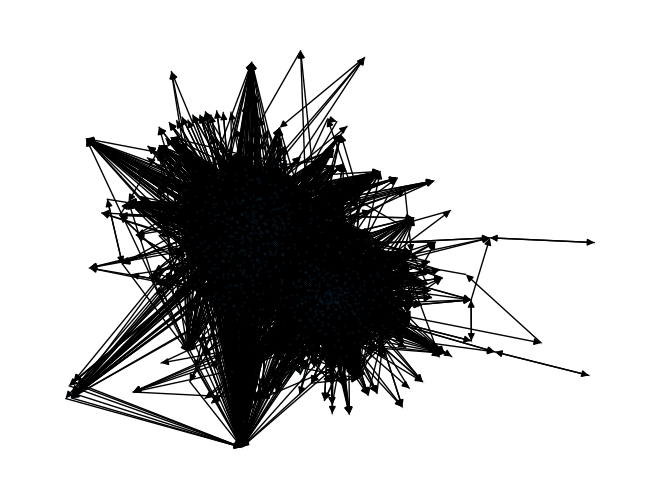

In [8]:

nx.draw(G_strcom, node_size= 0.01)
#nx.draw(G_weakcom, node_size = 0.001)

<p style="font-size: 16px" font-family:"sans-serif">
What we want to do now is to measure the degrees of nodes without using networkx.
Hence we will simply measure in and out degree of each node by summing entries in its row (out degree) and entries in its column (in degree). 
These meaasures will let us know what blogs are the most cited and what tend to cite the most, as we are interest in finding out if there exists some very influential blogs in the web network. </p>

In [11]:
names = G_strcom.nodes()
def Indegree(G,j):
    sum = 0
    A = nx.adjacency_matrix(G)
    #B = nx.to_numpy_matrix(A)
    N = G.number_of_nodes()       

    for i in range(N):
        sum += A[i,j]
    
    return sum

def Outdegree(G,i):
    sum = 0
    A = nx.adjacency_matrix(G_strcom)
    N = G.number_of_nodes()

    for j in range(N):
        sum += A[i,j]
    
    return sum 
   

#creating the indegree and outdegree lists, each containing ordered nodes, indegree/outdegree
indegrees = []
outdegrees = []
for f in range(G_strcom.number_of_nodes()):
    indegrees.append(Indegree(G_strcom, f))
    outdegrees.append(Outdegree(G_strcom,f))



    


C:\Users\39339\AppData\Local\Temp\ipykernel_9204\1592380672.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)
C:\Users\39339\AppData\Local\Temp\ipykernel_9204\1592380672.py:15: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G_strcom)


Below, the plot showing the in degrees. Note that in both graphs the dashed line show the mean.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


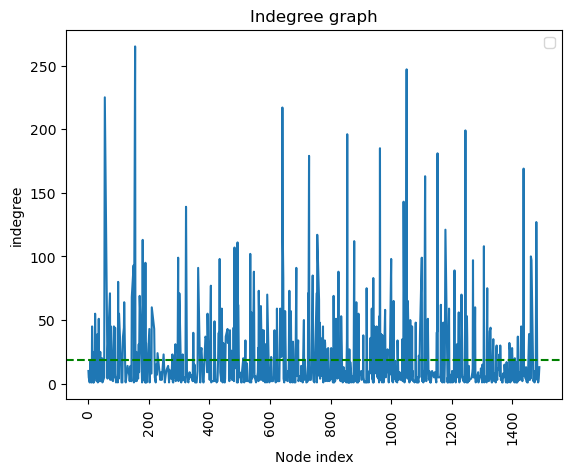

In [6]:
import statistics as s
mout = s.mean(outdegrees)   #the dashed lines represent the average in/out degree.
mIn = s.mean(indegrees)
plt.title('Indegree graph')
plt.xticks(rotation = 90)
plt.plot(names,indegrees)
plt.xlabel('Node index')
plt.ylabel('indegree')
plt.axhline(y = mIn, color = 'g', linestyle = '--')
plt.legend(loc = 'best')


Below, a plot of the outdegree for each node.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


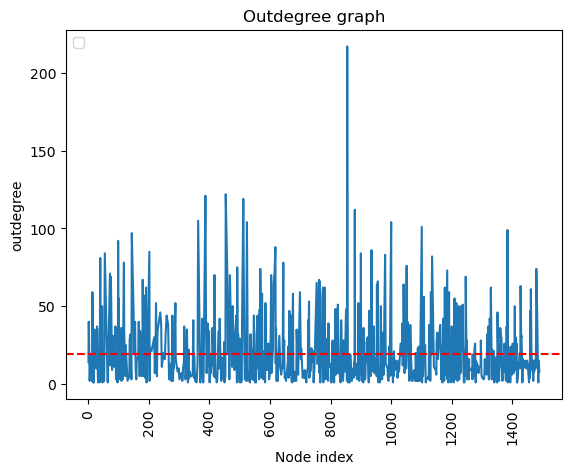

In [7]:

plt.title('Outdegree graph')
plt.xticks(rotation = 90)
plt.plot(names,outdegrees)
plt.xlabel('Node index')
plt.ylabel('outdegree')
plt.axhline(y = mout, color = 'r', linestyle = '--')
plt.legend(loc = 'upper left')


What we can do now, is to figure out nodes in G_strcom which have min/max indegree and outdegree.
We'll simply look at the index of them.

In [11]:
newnames = list(names)
maxout = max(outdegrees)
maxind = max(indegrees)
ind_max = indegrees.index(maxind)
out_max = outdegrees.index(maxout)
nodeind = newnames[ind_max]
nodeout = newnames[out_max]

print(f"node with max indegree is {nodeind} which has {maxind} indegree and {outdegrees[ind_max]} outdegree")
print(f"node with max outdegree is {nodeout} which has {maxout} outdegree and {indegrees[out_max]} indegree")

node with max indegree is 155 which has 265 indegree and 40 outdegree
node with max outdegree is 855 which has 217 outdegree and 196 indegree


<hr width='300' align='left' />
<p style="font-size: 15px" font-family:"sans-serif">
After understanding what blogs have the most citation/have cited the most, what we can further do is to plot the distribution of both indegree and outdegree to understand whether nodes have very similar centrality or not. </p>

Text(0.5, 1.0, 'Indegree distribution')

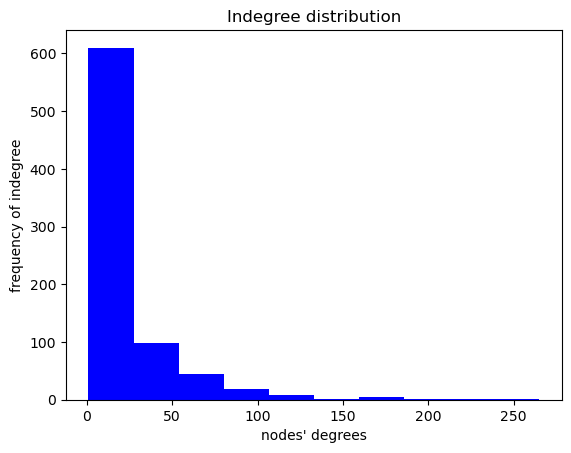

In [8]:

'''l = indegrees
l = np.array(l)
values, counts = np.unique(l, return_counts=True)

plt.plot(values, counts) 
plt.xlabel('degrees')
plt.ylabel('occurrences') '''

plt.hist(indegrees, facecolor = 'blue')
plt.xlabel("nodes' degrees")
plt.ylabel('frequency of indegree')
plt.title("Indegree distribution")


<i style ="font-size: 15px">
As we can see many nodes have very similar indegree. There are a few (maybe one) that have a huge indegree and it is indeed the blog we found before. Before studying the node, let us look at the outdegree distribution! </i>
<br> </br>

Text(0.5, 1.0, 'Outdegree distribution')

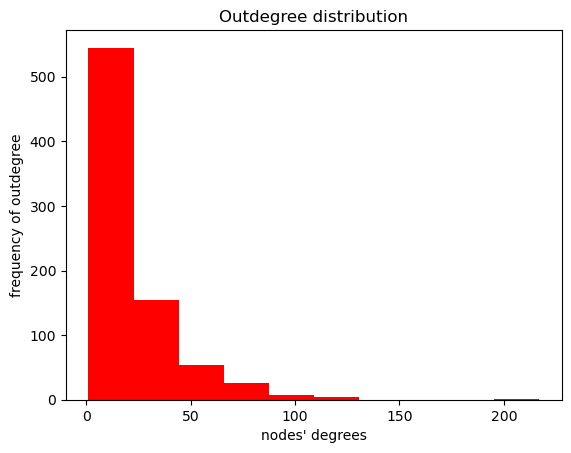

In [9]:
plt.hist(outdegrees, facecolor = 'red')
plt.xlabel("nodes' degrees")
plt.ylabel('frequency of outdegree')
plt.title("Outdegree distribution")


<i style ="font-size: 15px">
Again the same happens. Many nodes have same outdegrees and few seem to be really central as they may play a crucial role in the network.
It is now convenient to visualize the graph and of course it is better scaling the using node sizes according to their degree (say for indegree distribution). </i> <br> </br>

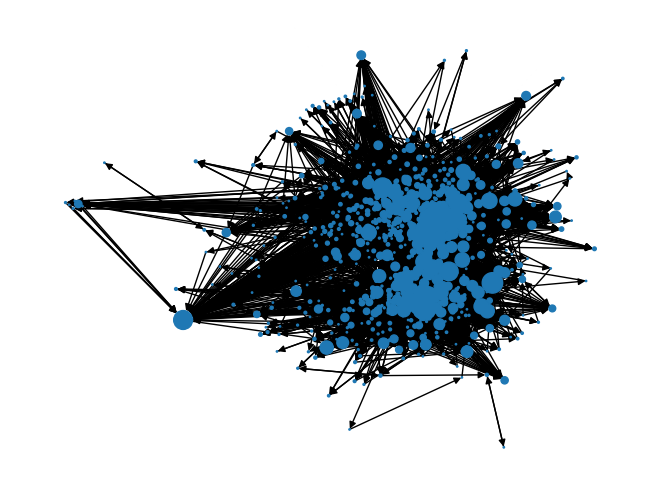

In [81]:
nx.draw(G_strcom, node_size = indegrees, with_labels= False)

<i style ="font-size: 15px">
Looking at the graph we might say that it is  pretty dense and some key blogs are really close to each other. Hence, an idea can be to easily compute the clustering coefficient which will tell us to what extent nodes tend to cluster together. </i>

### Week 3 - Hubs

<br> </br>
<p style="font-size: 15px" font-family:"sans-serif">
At the same time though, we see some blogs (with particular regard to the bottom-left one) which are not in the "centre of the graph" but have high in_degree; another measure that we can take into account then might be of course the closeness centrality.
We want to compute the normalized one but before we need to retrieve the shortest paths between all pairs and get the sum: the built in function all_pairs_shortest_path_length does the job. 
Since it is a generator, it is turned into a dictionary and then a new dictionary called 'distances', will contain the sum of all shortest paths for each node. </p>

In [74]:
#print(dict(nx.all_pairs_shortest_path_length(G_strcom)))
A = dict(nx.all_pairs_shortest_path_length(G_strcom))
distances = {}
for k,v in A.items():
    distances[k] = sum(v.values())
#print(distances)


Finally we can compute the closeness centrality as we have all the ingredients: a simple loop will get the job done.

In [75]:
distlist = list(distances.values())    #list containing the sum of shortest paths for each node
def closenesscentrality(G,distlist):
    closeness = {}
    listofnames = list(G.nodes())
    N = G.number_of_nodes()
                                                               
    for i in range(N):
        closeness[listofnames[i]] = (N-1)/(distlist[i]) 
    
    #print(closeness)
   
    return closeness  

closeness = closenesscentrality(G_strcom, distlist) 


    
    

The histogram below the code will show how similar the closeness centralities are among nodes (first 300 blogs with largest closeness centrality are considered).

Text(0.5, 1.0, 'Closeness centrality')

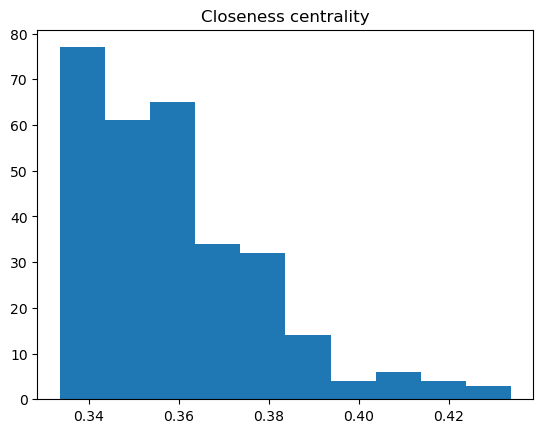

In [76]:
lstcentral = []
copyclose = closeness
copyclose = list(copyclose.values())
for i in range(300):
    lstcentral.append(max(copyclose))
    copyclose.remove(max(copyclose))

plt.hist(lstcentral)
plt.title("Closeness centrality")



<p style="font-size: 15px" font-family:"sans-serif">
Now that we have found the closeness centrality, we can see that many nodes have similar normalized centralities (as also shown in the degree distribution). After computing this measure we have a better understanding on the key blogs in the political network. The next step is to use another measure to assess the nodes' importance that is the pagerank; It ranks the importance of a webpage in the network. On this occasion it will rank the prestige of the single blogs and ideally the ones that are the most influential and cited by others. We expect that the pagerank is similar to the closeness centrality as an highly influential blog will be likely connected to other influential ones. </p>
<br> </br>

### Week 5 - PageRank

<p style="font-size: 15px" font-family:"sans-serif">
What we have done before was to create a list of the outdegrees of every node. We'll instead make a dictionary so that we can work better (especially for computing page rank, it will be really useful to have this data structure). </p>

In [ ]:
dictoutd = {}
listofnames = list(G_strcom.nodes())
for i in range(len(outdegrees)):
    dictoutd[listofnames[i]] = outdegrees[i]

print(dictoutd)



<p style="font-size: 15px" font-family:"sans-serif">
The first thing to do is to create a dictionary containing the list of predecessors for each node. This can be easily done with the predecessors built in function, which returns a list of the node's predecessors. </p>

In [ ]:

preddict = {}
initial = {}
for x in listofnames:
    preddict[x] = list(G_strcom.predecessors(x))
print(preddict)

#outdegrees dictionary




<p style="font-size: 15px" font-family:"sans-serif">
We want to compare our results to the actual ones made by the networkx function pagerank. This will tell us if our algorithm is making the right job or not. </p>

In [ ]:
#true pagerank 
N = G_strcom.number_of_nodes()
print(nx.pagerank(G_strcom,alpha= 0.85, tol=1e-06))



<br>
<p style="font-size: 15px" font-family:"sans-serif">
Pagerank algorithm finally comes. We set the parameter alpha and 1-alpha to get everything started. To make sure that we can start, we initialize the initial iteration pagerank values to be equal to 1/N, as the defintion suggests; those are all stored in pagerank dictionary that is then copied into pagerank2. The algorithm that we implemented is an iterative one which we keep running until the ith-1 and ith pagerank values are equal (they converge), as seen in the line containing the if condition "if pagerank[y]!=pagerank2[y]", where pagerank2 is the current iteration and pagerank the i-th one. After explaining this concept, it is easy to see how the algorithm works; in the first for loop every single pagerank for any node is computed and placed into pagerank2. In the second for loop we perform the if condition that we previously mentioned. </p>

In [ ]:
N = G_strcom.number_of_nodes()
alpha = 0.15/N 
R0 = 1/N  
scalpha = 0.85       #sum(R[i-1])


pagerank = {}
for i in listofnames:
    pagerank[i] = R0
pagerank2 = pagerank.copy()

while True:
    for y in preddict:
        v = preddict[y]
        summ = 0
        for i in v:
            summ = summ + (pagerank[i]/dictoutd[i])
        page = alpha + scalpha*(summ)
        
        pagerank2[y] = page
    c=0
    for y in pagerank:
        if pagerank[y]!=pagerank2[y]:
            #print(pagerank[y],pagerank2[y])
            continue
        else:
            c=c+1
    if c==len(pagerank):
        break
    else:
        pagerank=pagerank2.copy()
   
    
print(pagerank2) 



    


    
        


<br>
<p style="font-size: 15px" font-family:"sans-serif">
Let's see if pagerank centrality corresponds roughly to the closeness centrality we computed before!
As we can see the winner is node 155 which was the one with the highest indegree of the component.

In [20]:
maxpgrank = max(pagerank2.values())
ind = list(pagerank2.values()).index(maxpgrank)
print(f'The most central node according to pagerank is {listofnames[ind]}') 

The most central node according to pagerank is 155


<hr width="300" align="left" >
<p style="font-size: 15px" font-family:"sans-serif">
Let's plot our results in a plot, on the x axis the node number and o y their pagerank. The graph is very similar to the indegree distribution that we have already seen and the same nodes appear to be the most important ones in the network.

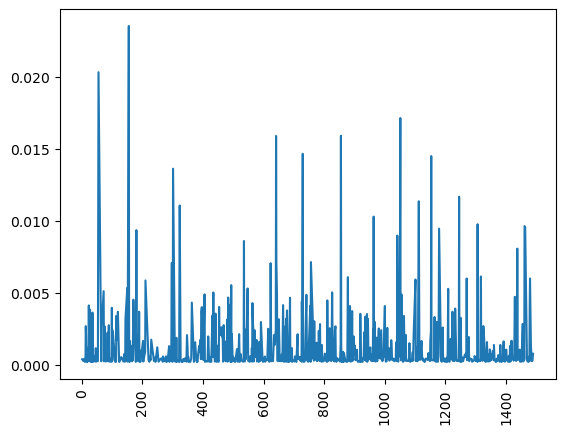

In [21]:
plt.xticks(rotation = 90)
plt.plot(listofnames, pagerank2.values())

<br>
<p style="font-size: 15px" font-family:"sans-serif">
Another thing that we can do is to plot the cumulative distribution of the pagerank centralities and compare it to the indegree centrality(we expect them to be quite similar). </p>

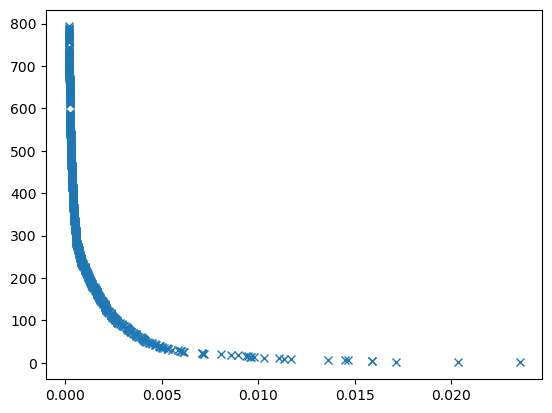

In [22]:
cdf_x = []  # list of x-axis
cdf_y = []  # list of y-axis

pr_values_copy = list(pagerank2.values()).copy() 
N = len(pr_values_copy)
N_temp = N 

while pr_values_copy:
    current_min = min(pr_values_copy) 
    current_num = pr_values_copy.count(current_min) 
    cdf_x.append(current_min) 
    cdf_y.append(N_temp)
    N_temp = N_temp - current_num 
    for n in range(current_num):  
        pr_values_copy.remove(current_min) 
        
plt.plot(cdf_x,cdf_y,"x")

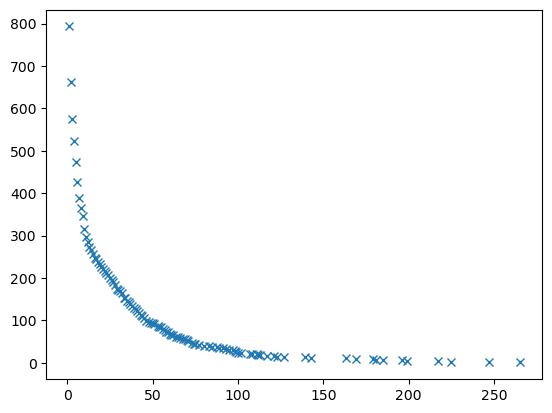

In [23]:
cdf_x = []  
cdf_y = []  

data_centralities_copy = indegrees.copy() 
N = len(data_centralities_copy)
N_temp = N 

while data_centralities_copy:
    current_min = min(data_centralities_copy) 
    current_num = data_centralities_copy.count(current_min) 
    cdf_x.append(current_min)
    cdf_y.append(N_temp) 
    N_temp = N_temp - current_num 
    for n in range(current_num):  
        data_centralities_copy.remove(current_min) 
        
plt.plot(cdf_x, cdf_y, "x")

<i style ="font-size: 15px">
Indeed, the 2 distributions are extremely similar, showing that there are a few crucial nodes which seem to be the most important blogs in the network, they receive a lot of citations and give them too (the outdegree distribution is again very similar to the indegree one, the blogs which are central are also the most important). </i>

<br>
<p style="font-size: 15px" font-family:"sans-serif">
Let's also have a look on the 300 nodes with the highest closeness centralities. </p>

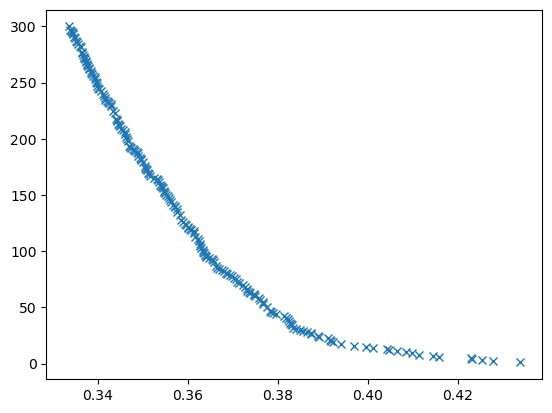

In [53]:
cdf_x = []  
cdf_y = []  

data_centralities_copy = lstcentral.copy() 
N = len(data_centralities_copy)
N_temp = N 

while data_centralities_copy:
    current_min = min(data_centralities_copy) 
    current_num = data_centralities_copy.count(current_min) 
    cdf_x.append(current_min)
    cdf_y.append(N_temp) 
    N_temp = N_temp - current_num 
    for n in range(current_num):  
        data_centralities_copy.remove(current_min) 
        
plt.plot(cdf_x, cdf_y, "x")

<br>
<p style="font-size: 15px" font-family:"sans-serif">
The next task we are going to do is community detection. Even though our component is itself a very dense and strong community we want to furtherly look for subcommunities in this network. It is important to make our component an undirected one; in this way we can implement all the techniques used in community detection. </p>

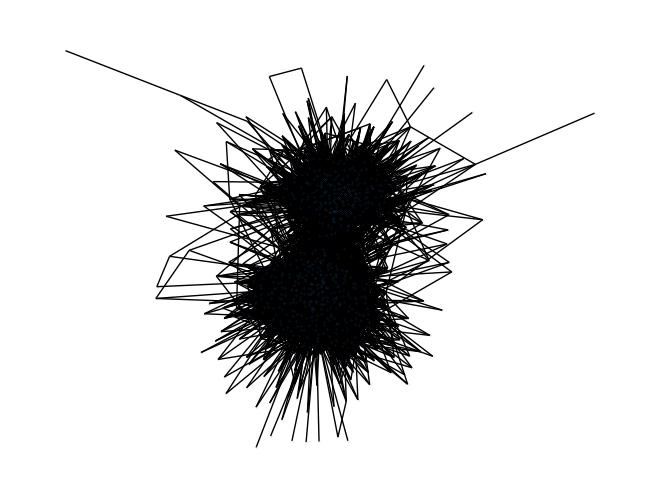

In [15]:
G_strund = nx.Graph(G_strcom)
G_strund.remove_edges_from(nx.selfloop_edges(G_strund))
nx.draw(G_strund, node_size = 0.01)

### Week 6 - Community Detection

<br>
<p style="font-size: 15px" font-family:"sans-serif">
We are now ready to implement three of the main techniques of community detection.
We start by implementing the bridge removal technique, hence the girvan-Newmann algorithm will be used; Betweenness centralities are computed and all links having the greatest BC are deleted until all nodes are disconnected. Below, we compute all partitions and their modularities, and we extract the one having the largest one using a simple dictionary.

In [4]:
partitions = nx.community.girvan_newman(G_strund) 
modularitiesbetwenness = []
partition_list=[]
for p in partitions:
    modularitiesbetwenness.append(nx.community.quality.modularity(G_strund, p))
    partition_list.append(p)

max_ind = modularitiesbetwenness.index(max(modularitiesbetwenness))

#IMPORTANT, DO NOT RUN THE ABOVE LINES OF CODE AS IT MAY TAKE HOURS MORE THAN FOUR HOURS!


<br>
<p style="font-size: 15px" font-family:"sans-serif">
Below you can find the communities detected by the Girvan-Newman's algorithm, there are many found but later on we will only consider the partition having maximum modularity.

In [ ]:
print(partition_list)

<br>
<p style="font-size: 15px" font-family:"sans-serif">
We now show the partition having maximum moduarity so that we can compare it with the other 2 techniques we'll be evaluating.

In [ ]:
best = list(partition_list[max_ind])
best_partition_dict={}
counter=1
for i in best:
    best_partition_dict[counter]=i 
    counter+=1

print(best_partition_dict)
frozen=frozenset(best_partition_dict)
print(frozen)



<br>
<p style="font-size: 15px" font-family:"sans-serif">
Below, we just retrieve the modularity of the partition having the best one among those found by the algorithm (objpart is the one, we have expressively assigned a variable to it for time and computational issues). As we mentioned before, the latter code took almost 5 hours to compute and it hence not reccomandable to run.
Bestmodularity is then the modularity for the partition. </p>

In [28]:
objpart= {1: {1, 2, 8, 10, 13, 14, 15, 16, 18, 21, 22, 23, 24, 27, 28, 29, 31, 32, 33, 34, 35, 36, 38, 40, 41, 42, 45, 46, 53, 55, 64, 65, 72, 73, 75, 79, 82, 85, 87, 89, 90, 92, 95, 97, 98, 99, 100, 101, 102, 109, 113, 114, 115, 118, 123, 124, 130, 137, 140, 142, 143, 144, 150, 151, 155, 156, 157, 159, 160, 162, 165, 167, 168, 170, 172, 178, 179, 180, 181, 185, 187, 188, 189, 190, 191, 192, 194, 202, 204, 205, 209, 210, 218, 220, 223, 224, 227, 229, 238, 241, 243, 249, 253, 256, 259, 264, 267, 268, 273, 275, 278, 279, 281, 282, 283, 288, 289, 295, 297, 298, 299, 300, 301, 307, 310, 311, 313, 316, 317, 323, 326, 329, 331, 332, 333, 335, 337, 341, 345, 347, 349, 350, 351, 353, 358, 361, 363, 370, 371, 374, 377, 379, 381, 387, 389, 391, 393, 394, 396, 399, 401, 402, 405, 409, 410, 415, 417, 420, 422, 427, 431, 432, 434, 436, 440, 441, 444, 446, 449, 451, 452, 453, 454, 460, 461, 465, 466, 467, 468, 469, 472, 475, 477, 479, 480, 481, 483, 484, 489, 492, 493, 494, 495, 498, 501, 503, 505, 508, 512, 517, 519, 521, 524, 527, 532, 535, 536, 538, 541, 544, 547, 549, 550, 551, 553, 554, 556, 559, 560, 561, 562, 563, 564, 566, 567, 568, 570, 572, 573, 574, 575, 577, 578, 579, 585, 587, 589, 590, 591, 596, 597, 598, 604, 605, 610, 612, 615, 618, 619, 620, 623, 631, 634, 637, 640, 641, 642, 644, 645, 647, 648, 649, 650, 653, 659, 660, 661, 662, 664, 667, 669, 671, 675, 676, 677, 680, 681, 684, 687, 688, 693, 694, 699, 702, 703, 708, 712, 713, 714, 721, 725, 726, 727, 729, 730, 731, 735, 736, 737, 741, 743, 747, 754, 755, 756, 809, 861, 911, 1131, 1225, 1229, 1477}, 2: {720, 5}, 3: {12}, 4: {17}, 5: {19}, 6: {47}, 7: {110}, 8: {119, 136, 312, 406, 438, 490, 500, 507, 515, 539, 600, 602, 679, 762, 763, 764, 765, 766, 767, 768, 772, 773, 775, 777, 778, 781, 782, 784, 786, 787, 788, 791, 792, 793, 796, 801, 802, 803, 805, 806, 807, 808, 810, 812, 813, 814, 815, 816, 817, 818, 822, 823, 824, 826, 828, 829, 830, 831, 835, 837, 838, 839, 840, 841, 842, 843, 847, 851, 852, 854, 855, 856, 857, 858, 859, 860, 862, 864, 865, 870, 873, 874, 876, 878, 879, 880, 881, 882, 883, 885, 887, 891, 892, 893, 894, 895, 897, 899, 900, 901, 903, 904, 907, 908, 909, 914, 915, 916, 918, 919, 921, 922, 926, 927, 930, 932, 933, 934, 935, 936, 937, 938, 940, 941, 942, 943, 944, 946, 950, 952, 953, 955, 956, 958, 959, 961, 962, 963, 964, 965, 966, 967, 968, 970, 971, 972, 973, 974, 975, 980, 981, 982, 988, 989, 991, 992, 993, 995, 1000, 1001, 1003, 1007, 1008, 1009, 1010, 1013, 1015, 1020, 1021, 1024, 1026, 1028, 1031, 1036, 1037, 1038, 1040, 1041, 1044, 1045, 1047, 1048, 1049, 1051, 1052, 1053, 1054, 1055, 1060, 1061, 1062, 1063, 1065, 1068, 1069, 1070, 1071, 1072, 1076, 1077, 1080, 1081, 1082, 1084, 1085, 1088, 1090, 1091, 1092, 1093, 1095, 1101, 1102, 1103, 1104, 1105, 1106, 1108, 1109, 1112, 1114, 1116, 1121, 1123, 1124, 1125, 1126, 1128, 1130, 1133, 1135, 1141, 1144, 1146, 1149, 1150, 1152, 1153, 1154, 1161, 1162, 1163, 1164, 1166, 1167, 1169, 1172, 1175, 1177, 1179, 1185, 1187, 1191, 1192, 1194, 1195, 1196, 1198, 1199, 1200, 1201, 1202, 1203, 1205, 1206, 1207, 1209, 1210, 1211, 1213, 1214, 1215, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1226, 1227, 1231, 1232, 1236, 1238, 1240, 1244, 1245, 1246, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1264, 1266, 1268, 1269, 1270, 1271, 1274, 1275, 1277, 1278, 1280, 1287, 1288, 1290, 1295, 1296, 1298, 1300, 1301, 1305, 1306, 1307, 1308, 1309, 1310, 1315, 1317, 1318, 1320, 1321, 1322, 1323, 1325, 1328, 1329, 1332, 1333, 1334, 1337, 1338, 1339, 1340, 1344, 1345, 1346, 1348, 1349, 1350, 1351, 1352, 1356, 1357, 1359, 1360, 1362, 1364, 1366, 1368, 1369, 1371, 1372, 1373, 1374, 1379, 1381, 1383, 1384, 1385, 1387, 1389, 1390, 1392, 1393, 1394, 1395, 1396, 1399, 1401, 1402, 1404, 1406, 1407, 1408, 1409, 1411, 1412, 1413, 1414, 1418, 1419, 1420, 1421, 1422, 1423, 1425, 1426, 1427, 1429, 1430, 1432, 1433, 1435, 1436, 1437, 1438, 1441, 1444, 1445, 1446, 1449, 1451, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1463, 1469, 1471, 1472, 1473, 1475, 1476, 1478, 1479, 1482, 1487, 1489}, 9: {193, 534}, 10: {203}, 11: {280}, 12: {321}, 13: {380, 622}, 14: {424}, 15: {426}, 16: {439}, 17: {450}, 18: {491}, 19: {584}, 20: {625}, 21: {674}, 22: {744}, 23: {776}, 24: {833}, 25: {863}, 26: {960}, 27: {1006}, 28: {1087}, 29: {1129}, 30: {1165}, 31: {1186, 1378}, 32: {1188}, 33: {1242}, 34: {1279}, 35: {1367}, 36: {1415}, 37: {1416}, 38: {1485}, 39: {1486}}
listit = []
for v in objpart.values():
    listit.append(list(v))

bestmodularity = nx.community.modularity(G_strund, listit) 

print(bestmodularity)

0.43140658273611443


<hr width="300" align="left">
<p style="font-size: 15px" font-family:"sans-serif">As we have seen the girvan newman algorithm is extremely slow, as the number of clusters (communities) identified is huge (39 partitions found in almost 5 hours).
The next algorithm that we will use is the newman's greedy algorithm, a slow but effective algorithm that optimizes the modularity of each partition, merging the 2 having the lowest decrease in the graph modularity.
It is then convenient to save found clusters in a dictionary. We will also compute the time needed for computing the code so that we can make a comprehensive comparison among the 3 community detenction algorithms.

In [25]:
import time    #compute execution time
start = time.time()
mod_opt = nx.community.greedy_modularity_communities(G_strund)  
print(mod_opt)
nmodopt = len(mod_opt)   #nclusters identified
print(f"There are {len(mod_opt)} detected communities using the newman's greedy algorithm")
end = time.time()
timemodopt = end-start 
mod_opt2 = [list(c) for c in mod_opt] 
clustersmod_opt = {}
n = 1
for x in mod_opt2:
    clustersmod_opt[n] = x    #this code can be run, takes few seconds.
    n+=1                      #n indicates the ith small communities found in the partition.

[frozenset({1024, 1026, 1028, 5, 1031, 1036, 1037, 1038, 1040, 1041, 1044, 1045, 1047, 1048, 1049, 1051, 1052, 1053, 1054, 1055, 1060, 1061, 1062, 1063, 1065, 1068, 1069, 1070, 1071, 1072, 1076, 1077, 1080, 1081, 1082, 1084, 1085, 1087, 1088, 1090, 1091, 1092, 1093, 1095, 1101, 1102, 1103, 1104, 1105, 1106, 1108, 1109, 1112, 1114, 1116, 1121, 1123, 1124, 1125, 1126, 1128, 1129, 1130, 1133, 1135, 1141, 119, 1144, 1146, 1149, 1150, 1152, 1153, 1154, 136, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1169, 1172, 1175, 1177, 1179, 1185, 1187, 1188, 1191, 1192, 1194, 1195, 1196, 1198, 1199, 1200, 1201, 1202, 1203, 1205, 1206, 1207, 1209, 1210, 1211, 1213, 1214, 1215, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1226, 203, 1227, 1231, 1232, 1236, 1238, 1240, 1242, 1244, 1245, 1246, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1264, 1266, 1268, 1269, 1270, 1271, 249, 1274, 1275, 1277, 1278, 1279, 1280, 1287, 1288, 1290, 1295, 1296, 1298, 1300, 1301, 1305, 1306, 1307, 1308, 1309,

<hr width="300" align="left">
<p style="font-size: 15px" font-family:"sans-serif">
For the label propagation algorithm we will use a list instead of frozen set as this data structure will be extremely useful when computing NMI and other comparison parameters.

In [23]:
import time
start = time.time()
labprcom = nx.community.asyn_lpa_communities(G_strund)

partition_lp = [list(c) for c in labprcom]   #we used a list instead of a frozen set
labmod = {}   
print(partition_lp)
npartlab = len(partition_lp)
print(f"There are {len(partition_lp)} communities detected using the label propagation algorithm")
end = time.time()
lpatime = end-start 
n = 1
clusterslp = {}
for y in partition_lp:
    clusterslp[n] = y
    n+=1                       



[[1, 2, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 27, 28, 29, 31, 32, 33, 34, 35, 36, 38, 40, 41, 42, 45, 46, 47, 53, 55, 64, 65, 72, 73, 75, 79, 82, 85, 87, 89, 90, 92, 95, 97, 98, 99, 100, 101, 102, 109, 110, 113, 114, 115, 118, 123, 124, 130, 137, 140, 142, 143, 144, 150, 151, 155, 156, 157, 159, 160, 162, 165, 167, 168, 170, 172, 178, 179, 180, 181, 185, 187, 188, 189, 190, 191, 192, 194, 202, 204, 205, 209, 210, 218, 220, 223, 224, 227, 229, 238, 241, 243, 249, 253, 256, 259, 264, 267, 268, 273, 275, 278, 279, 280, 281, 282, 283, 288, 289, 295, 297, 298, 299, 300, 301, 307, 310, 311, 313, 316, 317, 321, 323, 326, 329, 331, 332, 333, 335, 337, 341, 347, 349, 350, 351, 353, 358, 361, 363, 371, 374, 377, 379, 380, 381, 387, 389, 391, 393, 394, 396, 399, 401, 402, 405, 409, 410, 415, 417, 420, 422, 424, 426, 427, 431, 432, 434, 436, 439, 440, 441, 444, 446, 449, 450, 451, 452, 453, 454, 460, 461, 465, 466, 467, 468, 469, 472, 475, 477, 479, 480, 481, 483, 484, 489, 491, 4

<hr width="300" align="left">
<p style="font-size: 15px" font-family:"sans-serif">
Once we have found all the communities, we want to compare them all to some metrics: NMI , cluster size distribution and computational time and modularity. Before though, we want to create 2 vectors (one for each algorithm), such that each element in the vector corresponds to the n-th cluster it was assigned to. In this way we can easily compute the NMI. 

In [29]:
listgreedy = []
listlpa = []
listnirnew = []

Nodesund = list(G_strund.nodes())
for node in Nodesund:
    for k,v in clustersmod_opt.items():
        if node in v:
            listgreedy.append(k) 

    for k,v in clusterslp.items():
        if node in v: 
            listlpa.append(k)

    for k,v in objpart.items():
        if node in v:
            listnirnew.append(k)




<br>
<hr width="300" align="left">
<p style="font-size: 15px" font-family:"sans-serif">
It is now time to compute the metrics that help us understand what algorithms made the best job, so the NMI is assessed among the algorithms. We want to understand if the partitions made by the three different algorithms are very similar or completely different. The other 2 functions simply assess cluster sizes (trivial) and number of detected clusters. A dataframe summarizes the results.

In [27]:
from sklearn.metrics.cluster import normalized_mutual_info_score
import networkx.algorithms.community as nx_comm

def nmi(G_strund,part1, part2):
    nmi = normalized_mutual_info_score(part1,part2)       
    return nmi 


nmi1 = nmi(G_strund, listgreedy, listlpa)
nmi2 = nmi(G_strund,listgreedy, listnirnew)
nmi3 = nmi(G_strund, listlpa, listnirnew)


def nclusters(part):      #nclusters
    nclusters = len(part)
    print(f'The number of clusters in the partition is: {nclusters}')
    return nclusters 

nclusterslp = nclusters(clusterslp.values()) 
nclustersmod_opt = nclusters(clustersmod_opt.values()) 
ngirvannew = nclusters(objpart.values())

def cl_size(part):         #cluster sizes distribution
    distr = []
    for el in part.values():
        distr.append(len(el))
    
    plotdistr = plt.hist(x = distr)
    return plotdistr 


#distrnirvannew = cl_size(objpart) 
#distrlp = cl_size(clusterslp)   #takes as input either dictionary containing partition of each technique
#distrmodopt = cl_size(clustersmod_opt)   #the 2 distributions are very similar!!


def modularity(G_strund, part):
    modularity = nx_comm.quality.modularity(G_strund,part)
    return modularity 

modlp = modularity(G_strund, list(clusterslp.values())) 
mod_modopt = modularity(G_strund, list(clustersmod_opt.values())) 

#comparing modularities of partitions 
'''print(modlp)
    print(mod_modopt)
    print(bestmodularity)    they have basically the same modularity '''

#creating 2 dataframes which summarise results
dictiocom = {'Number of clusters': [ngirvannew,nclustersmod_opt,nclusterslp], 'Modularity': [bestmodularity, mod_modopt, modlp], 'Computational time': ['>= 5 hours', str(timemodopt) + ' ' + 'sec', str(lpatime) + ' ' + 'sec']}  #creating a dict to make a df
dfcomparison1 = pd.DataFrame(dictiocom, index = ['Girvan-Newman algorithm','Greedy newman algorithm', 'Label propagation algorithm'])


dictiocom2 = {'Normalized Mutual Information': [nmi1,nmi2,nmi3]}
dfNMI = pd.DataFrame(dictiocom2, index = ['Greedy newman and label propagation algorithm','Greedy newman and Girvan-newman', 'label propagation algorithm and Girvan-newman' ])
dfNMI.index.name = 'Pair'
display(dfcomparison1)
display(dfNMI)

    

The number of clusters in the partition is: 4
The number of clusters in the partition is: 4
The number of clusters in the partition is: 39


,Number of clusters,Modularity,Computational time
Girvan-Newman algorithm,39,0.431407,>= 5 hours
Greedy newman algorithm,4,0.433401,3.323697566986084 sec
Label propagation algorithm,4,0.433549,0.029662370681762695 sec


,Normalized Mutual Information
Pair,
Greedy newman and label propagation algorithm,0.927164
Greedy newman and Girvan-newman,0.803140
label propagation algorithm and Girvan-newman,0.798905


<i style ="font-size: 15px">
As we can notice from the dataframes, the modularities of  the partitions are  basically the same, so there's no major advantage in one algorithm. The NMI is pretty close to 1 between Greedy newman and the label propagation algorithm, meaning they contain very similar and mutual additional information, the number of clusters found is the same too. It is hence difficult to pick the best one, one may choose label propagation because of the slightly higher modularity on average and the faster computational time (100 times faster). The girvann-Newmann algorithm is disregarded because of its slowness and its lower modularity. 

### Week 7 - Topological Similarity Indices

<br>
<hr width="300" align="left">
<p style="font-size: 15px" font-family:"sans-serif">
In this section, we will create a class containing all the methods that allow us to compute the topological similarity indices among partitions. For each index we initiate an empty dictionary which will contain all the pairs of nodes and their respective index.
For the sake of clearness, a class named Indeces is done and contains all the methods that compute the topological similarity indices.

In [16]:
cndict = {}
jidict = {}
padict = {}
aadict = {}
radict = {}
con_pairs = list(G_strund.edges())
pairs = []

ji = list(nx.jaccard_coefficient(G_strund))
for el in ji:
    pair = (el[0],el[1])
    pairs.append(pair) 



class Indeces:                           #this class contains all the methods to compute topological similarity indeces
    def __init__(self, pairs, graph):
        self.graph = graph
        self.pairs = pairs

    def Cn(self,graph,pairs):
        for el in pairs:
            c = nx.common_neighbors(graph, el[0], el[1])
            cndict[el[0],el[1]] = len(list(c))
        
        return cndict  


    def Ji(self,graph,pairs):
        ji = list(nx.jaccard_coefficient(graph))
        for x in ji:
            jidict[x[0],x[1]] = x[2]
        
        return jidict


    def PA(self,graph,pairs):
        pa = list(nx.preferential_attachment(graph))
        for x in pa:
            padict[x[0],x[1]] = x[2]

        return padict

    
    def AA(self,graph,pairs):
        aa = list(nx.adamic_adar_index(graph))  
        for x in aa:
            aadict[x[0],x[1]] = x[2]
        
        return aadict
    
    
    def RA(self,graph,pairs):
        ra = list(nx.resource_allocation_index(graph))
        for x in ra:
            radict[x[0],x[1]] = x[2] 
        
        return radict 
    
indeces = Indeces(pairs, G_strund)   #object indices is initialized.
cn = indeces.Cn(G_strund,pairs)
ji = indeces.Ji(G_strund,pairs)
pa = indeces.PA(G_strund,pairs)
aa = indeces.AA(G_strund,pairs)
ra = indeces.RA(G_strund,pairs)
A=[]
for i in list(aa.keys()):     # The array A contains the unconnected pairs of the network(no hyperlink between blogs)
    A.append(i)








<br>
<p style="font-size: 15px" font-family:"sans-serif">
Once we have computed the indices, we want to create a dataframe comprising all of them.
As requested we define the 2 scores as the arithmetic mean of the indeces and the sum of them for each couple. Moreover, since we are asked to compute the link likelihood scores for unconnected nodes, the unconnected nodes are retrieved from A, a list containing all the pairs of unconnected nodes.

In [17]:
cnval = cndict.values()
jival = jidict.values()
paval = padict.values()
aaval = aadict.values()
raval = radict.values()
dictionary_test={}
dictionary_test={"CN":list(cnval),"JI":list(jival), "PA":list(paval), "AA":list(aaval), "RA":list(raval)}

test_dataframe=pd.DataFrame(dictionary_test, index=A)  #dataframe with indeces 
test_dataframe.head()

,CN,JI,PA,AA,RA
"(1, 5)",0,0.000000,69,0.000000,0.000000
"(1, 8)",4,0.090909,575,0.926722,0.058154
"(1, 10)",5,0.156250,322,1.018116,0.042593
"(1, 12)",1,0.040000,69,0.178270,0.003663
"(1, 13)",7,0.100000,1242,1.430558,0.057368


<hr width="300" align="left">

<p style="font-size: 15px" font-family:"sans-serif">
Now that we have the dataframe, we want to scale the data in the range (0,1). We can either use the linear scaling used during lectures (MinMaxscaler), or alternatively one can use the standard scaler method in sklearn, it computes the z-score for every entry. At this stage the linear scaling is more adequate.

In [18]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
df_scaled= {}
df_scaled = scaler.fit_transform(test_dataframe[['CN', 'JI', 'PA', 'AA', 'RA']])


df_scaled = pd.DataFrame(df_scaled, index = A, columns = ['CN', 'JI', 'PA', 'AA', 'RA'])
df_scaled.head()

,CN,JI,PA,AA,RA
"(1, 5)",0.000,0.000000,0.000933,0.000000,0.000000
"(1, 8)",0.032,0.090909,0.007875,0.025102,0.012266
"(1, 10)",0.040,0.156250,0.004404,0.027578,0.008984
"(1, 12)",0.008,0.040000,0.000933,0.004829,0.000773
"(1, 13)",0.056,0.100000,0.017026,0.038750,0.012100


<hr width="300" align="left">

<p style="font-size: 15px" font-family:"sans-serif">
As we have scaled down the data, we compute the mean_score for each variable using the numpy method mean, since we consider each index to be a good score. Then we add to the dictionary the column Mean.

In [19]:
mean_score = df_scaled.aggregate(np.mean, axis = 1) 
#sum_score = df_scaled.aggregate(np.sum, axis = 1) 
mean_score = list(mean_score)
#sum_score = list(sum_score)
df_scaled["Mean"] = mean_score
#df_scaled["Sum"] = sum_score

final_dataframe=pd.DataFrame(df_scaled, index=A)
final_dataframe.head()

,CN,JI,PA,AA,RA,Mean
"(1, 5)",0.000,0.000000,0.000933,0.000000,0.000000,0.000187
"(1, 8)",0.032,0.090909,0.007875,0.025102,0.012266,0.033630
"(1, 10)",0.040,0.156250,0.004404,0.027578,0.008984,0.047443
"(1, 12)",0.008,0.040000,0.000933,0.004829,0.000773,0.010907
"(1, 13)",0.056,0.100000,0.017026,0.038750,0.012100,0.044775


<hr width="300" align="left">

<p style="font-size: 15px" font-family:"sans-serif">
We finally change the names of the columns due to the fact that we now consider them as scores.

In [20]:
final_dataframe.columns = ('CN_score', 'JI_score', 'PA_score', 'AA_score', 'RA_score', 'Mean_score')
final_dataframe.head()

,CN_score,JI_score,PA_score,AA_score,RA_score,Mean_score
"(1, 5)",0.000,0.000000,0.000933,0.000000,0.000000,0.000187
"(1, 8)",0.032,0.090909,0.007875,0.025102,0.012266,0.033630
"(1, 10)",0.040,0.156250,0.004404,0.027578,0.008984,0.047443
"(1, 12)",0.008,0.040000,0.000933,0.004829,0.000773,0.010907
"(1, 13)",0.056,0.100000,0.017026,0.038750,0.012100,0.044775


<hr width="300" align="left">
<p style="font-size: 15px" font-family:"sans-serif">
We now want to find the top 10 pair of nodes for each of the 7 link likelihood scores. We will do so just by ranking the dataframe's columns.


In [21]:
ranked_df = final_dataframe.rank(axis = 0, method = 'first', ascending = False)
CN_pred = ranked_df[ranked_df['CN_score'] <= 10].index.to_list()
print("this is the top 10 for the CN:", CN_pred)
JI_pred = ranked_df[ranked_df['JI_score'] <= 10].index.to_list()
print("this is the top 10 for the JI: ", JI_pred)
PA_pred = ranked_df[ranked_df['PA_score'] <= 10].index.to_list()
print("this is the top 10 for the PA: ", PA_pred)
AA_pred = ranked_df[ranked_df['AA_score'] <= 10].index.to_list()
print("this is the top 10 for the AA: ", AA_pred)
RA_pred = ranked_df[ranked_df['RA_score'] <= 10].index.to_list()
print("this is the top 10 for the RA: ", RA_pred)
Mean_pred = ranked_df[ranked_df['Mean_score'] <= 10].index.to_list()
print("this is the top 10 for the Mean: ", Mean_pred)






this is the top 10 for the CN: [(155, 483), (155, 756), (180, 323), (483, 641), (855, 1051), (855, 1153), (855, 1245), (855, 1479), (963, 1153), (963, 1245)]
this is the top 10 for the JI:  [(776, 1242), (776, 1415), (776, 1416), (776, 1006), (1006, 1242), (1006, 1415), (1006, 1416), (1242, 1415), (1242, 1416), (1415, 1416)]
this is the top 10 for the PA:  [(55, 855), (55, 1051), (155, 855), (155, 963), (155, 1051), (155, 1245), (155, 1437), (641, 855), (855, 1051), (855, 1245)]
this is the top 10 for the AA:  [(155, 483), (155, 756), (855, 1051), (855, 1153), (855, 1245), (855, 1479), (855, 1000), (963, 1153), (963, 1245), (1000, 1437)]
this is the top 10 for the RA:  [(855, 1051), (855, 1153), (855, 1245), (855, 1479), (855, 1000), (963, 1153), (963, 1245), (963, 1437), (963, 1000), (1000, 1437)]
this is the top 10 for the Mean:  [(155, 483), (855, 1051), (855, 1153), (855, 1245), (855, 1479), (855, 1000), (963, 1153), (963, 1245), (1000, 1437), (1153, 1437)]


<i style ="font-size: 15px">
As we can observe from the results, there is a pair of nodes that always ranks top to be a missing connected pair, except for 1 occasion. Out of the 32 different pairs there are 10 which appear more than once and they are likely to be central in the graph, in particular they have the highest number of connections as one can easily show. We suspect that these pairs represent blogs that have different political oreientation, for each pair (d,c) one is a democrat blog and the other is conservative.
<br>

### Week 9 - Random Graph

<hr width="300" align="left">
<p style="font-size: 15px" font-family:"sans-serif">
In the section below, we will use a variation of the Preferential attachment to compare our graph to it. As we have seen with the closeness centralities measures, there are one blogs which create a lot of hyperlinks, and therefore the Preferential attachment model seems to fits well with our network, we found out that there are some major blogs which act as Hubs.

In [6]:
N = G.number_of_nodes()  #getting the number of nodes from the original graph


Based on how information is usually spread on the internet, that is, the same scenario where our political blogs communicate, we create this random graph that is a random growing one where: 

<ul> 
<li> with p = 0.1 a new node interacts with an important blog (Preferential attachment), that is, it references an important blog 10% of the time </li> 
<li> with very low probability q (say 0.06), since in original graph edges represent 94% of total nodes, node does not attach to anyone (isolated or disappeared blogs)</li>
<li> with s = 1-q-p (almost 0.9 probability), the node gets attached with uniform attachment, making no distinction between blogs(a blog does not assume the importance of a particular blog, but chooses the one with the news it is interested in) </li>  

In [63]:
def variation_pa(node_num, edge_num):
    m=edge_num
    v=node_num
    graph = nx.DiGraph()
    graph.add_nodes_from([v for v in range (1,20249)])     #adding nodes
    c=m-1
    #isolated = []
    k = 0
    for i in range(v):
        if c==0:
            c=c+1
            graph.add_edge(1,0,lenght=1)
        else:
            p = random.uniform(0,1)    #introducing stochasticity
            
            if p >= 0.9:      #node attaches with PA
                c+=1
                list_deg = graph.degree(range(c))  # degrees until c
                rnd = random.randint(1,c)
                lists = np.random.choice(range(c), m , list_deg) 
                for n in lists:
                    graph.add_edge(c,n,lenght=1)     #this is done since we don't want each node to be dependent of PA, but it is a mix with UA!
                    
            elif p <= 0.06:        #node remains isolated
                                   #since edges in original graph represent 94% of nodes
                c+=1
                continue
            else:
                c=c+1
                n = random.randint(1,c)
                o = random.randint(c,v)        #uniform attachment, that is a new node attaches to one which may be attached to 
                p2 = random.uniform(0,1)       #to an already explored node or a new one
                if p2<=0.5:
                    graph.add_edge(c,n,length=1)     
                else:
                    graph.add_edge(c,o)               #the node can either attach to an already explored on unexplored one,
                                                      #it does not assume importance but rather(hopefully) it references what matters


    
    
       
    

    
    return graph

graph2=variation_pa(N,1)



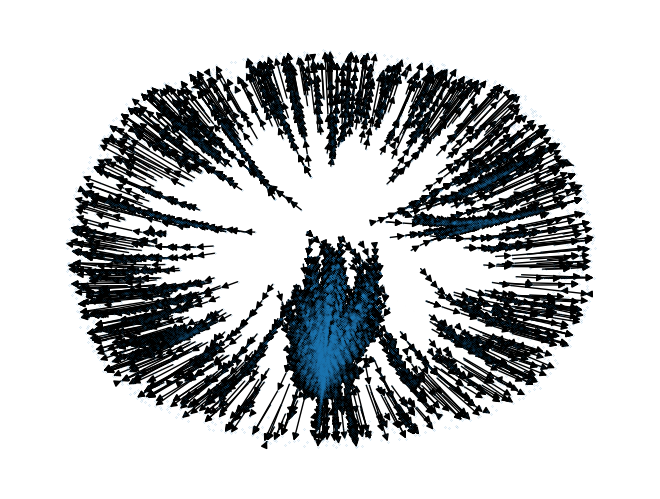

In [62]:
nx.draw(graph2, node_size=0.01)

<i style ="font-size: 15px">
Our new randomly generated graph.

<hr width="300" align="left">
<p style="font-size: 15px" font-family:"sans-serif">
We now need to calculate the average degree for the random graph and compare it to the original graph

In [64]:
print(f"Average degree for the original graph is {av_degree(G)}")
print(f"Average degree for the random graph is {av_degree(graph2)}")


Average degree for the original graph is 1.8791051409946171
Average degree for the random graph is 1.8808888888888888


<i style ="font-size: 15px">
The average degree is very close to the one we obtained in the original graph; this may be due to the very close number of edges and small-world properties of the two graphs. There are indeed for both graphs some isolated nodes which compensate the massive degree of certain hubs and very connected communities.

<p style="font-size: 15px" font-family:"sans-serif">
As the probability of preferential attachment is quite high and the nodes are not interconnected (that is, in a growing random graph nodes that are already seen do not connect with each other), we expect that the centrality measures will not be similar as the new random graph presents a large community (a giant hub where all nodes basically point to a few influential nodes) and the others are smaller (due to the UA property).

<p style="font-size: 15px" font-family:"sans-serif">
Let us check the largest weakly connected component and the largest one so that we can compare them with the original graph ones.

In [65]:
G_weakcom2 = graph2.subgraph(max(nx.weakly_connected_components(graph2), key=len))

In [66]:
G_strcom2 = graph2.subgraph(max(nx.strongly_connected_components(graph2), key=len))

<p style="font-size: 15px" font-family:"sans-serif">
As we supposed previously, the strongly connected component is very small (ranges from 5 to max 15 nodes for multiple random graph generations) and it is then better to compare a property taken from the largest weakly components of the 2 graphs, as they present similar number of total nodes. 
To understand if the 2 sample graphs present similar characteristics, we will simply find the average distance in both and compare it. We suspect that it will be much less in the random graph as the largest weakly community in the random graph, has much less connections (edges between nodes).

In [67]:
print(av_distance(G_weakcom2))
print(av_distance(G_weakcom))

The average distance in the graph is: 0.46329935948704276
0.46329935948704276
The average distance in the graph is: 2.229538718900421
2.229538718900421


<hr width="300" align="left">
<i style ="font-size: 15px">
Indeed the average distance of the random graph is more than 1/5 of the original one; this is due to the presence of the prefential attachment in the random graph generation, as it is likely that a few nodes act as hub and many are connected to it (it is shown in the graph). This leads to a smaller average distance as it is easy to see that the edges in the largest weekly connected component of the original graph are much more- Hence the nodes are more "spread" and less close to each other, although still having small world properties.

### Week 10 - Simulation

We will consider an Independent Cascade Model. Suppose that a political blog needs to increase its popularity and wants to communicate and reference blogs supporting its same party. The innovation cascade model, given a new political trend/news, tells us how likely blogs connect and reference to the blog which posted/introduced the trend. We will use montecarlo simulations, to try multiple scenarios and then average the number of nodes which have been activated by the innovators, to see if there exists some evidence that an influent political blog tends to interact and affect similar and smaller blogs. The initial "innovators" are those who have the highest degrees, that is, the blogs receiving the most references from others(we saw that nodes having high indegrees also do have high outdegree). Out of the over 20000 nodes in our network, we will select n arbitrary random seeds (innovators) that have published the news (innovation), and see if there is consistency in results as we change parameters (number of innovators and probability to be activated by seeds). The seeds are taken first from non-influential nodes (random) and also from the nodes having largest degrees (the ones which are seen the most) to check differences in news spreading/references.

In [100]:
sortedind = sorted(G.degree(), key= lambda x: x[1], reverse=True) #sorting the degrees in decreasing order
sortfin = []
for s in range(100):
    sortfin.append(sortedind[s][0])   #first 100 nodes with highest degree!

<p style="font-size: 15px" font-family:"sans-serif">
In this section you can choose the number of innovators you want and also you can choose to either take innovators from the top 100 nodes with highest degrees or just select them randomly from all the node population.

In [101]:
x = int(input("choose how many innovators you want to have: "))          #these are all the blogs which may spread some important information.
y = str(input("Choose yes if you want to select n random innnovators from the most influential nodes(at most 20): "))
innovators = [] 
if y == "yes":
    for i in range(x):
        el = random.randint(0, len(sortfin)-1)    #taking x random innovators from the ones with highes degrees
        innovators.append(sortfin[el])
else:
    #if one wants random selected nodes from all the nodes
    for i in range(x):
        names1 = list(names)  #listofnames
        el = random.randint(0,len(names1)-1)   #taking x random innovators from the strongly connected component nodes' list  
        innovators.append(names1[el])

#these are the random initial innovators. 


In [97]:
msdict = {}  #dictionary to be filled with results
msdict['Number of innovators'] = []
msdict['Probability'] = []
msdict['Iterations'] = []
msdict['average number of nodes activated'] = []

<p style="font-size: 15px" font-family:"sans-serif">
We first define a function that simply takes each neighbour of the activated nodes in the i-th montecarlo simulation.

In [102]:
def target(g,p,new_active):
    
    targets = []
    for node in new_active:
        targets += g.neighbors(node)

    return targets 

<p style="font-size: 15px" font-family:"sans-serif">
After defining the target function, we dive into the monte carlo simulation, which will simulate the independent cascade model. Chosen a number of iterations, for each iteration, every neighbor of the active nodes (initially there are only the innnovators), gets activated with probability p (arbitrary) and remains inactive with (1-p) probability. If activated (the success is a condition such that if the random probability p is succcessful, then nodes which have been activated (and sampled) are extracted from the array and then put into A (all activated nodes so far) and also into the new_activated that basically represent the nodes never activated in previous iterations(note that)
At the end, we obtain the average number of nodes activated in each simulation; with p and n_simulations we can decide, respectively, the probability that when a blog meets an innovator (noticing the news), gets active, and inp2 is the number of montecarlo simulations we would like to do.
This method allows us to understand how fast new blogs may receive and send information as well as how political opinions and trends propagate throughout the network.

In [105]:
def IC(G,innovators,p,ms):
    # Loop over the Monte-Carlo Simulations
    spread = []      
    for i in range(ms):   
        # information propagation process      
        new_activated, A = innovators[:], innovators[:]   #these are initially empty
        
        while new_activated:           
            
            targets = target(G,p,new_activated)    #taking the neighbors of the innovator.
            
            #new_ones are the new activated nodes (set seed and sort for consistency)
            np.random.seed(i)
            success = np.random.uniform(0,1,len(targets)) < p       # generate random probability and see if it is succcesful
            new_ones = list(np.extract(success, sorted(targets)))   #extract from sampled array, nodes which have been activated
            
    
            new_activated = list(set(new_ones) - set(A))        #adding blogs which have never activated before (we use set but we could have used list but this is more efficient given the huge number of nodes we have)
            A += new_activated  
                
        spread.append(len(A))  #how many nodes have been innovated during this monte carlo iteration
    
    print(f"The average number of activated nodes after {ms} montecarlo iterations is {np.mean(spread)}")    
    return(np.mean(spread), A)    #returning how many nodes in average have been innovated during the innovation cascade model trials.

p = float(input("choose the activation probability: "))
n_simulations = int(input("Number of monte carlo simulations: "))
Inn_C = IC(G, innovators, p , n_simulations)   #probability set to 0.5 (arbitrary)

#adding results to dictionary
msdict['Number of innovators'].append(len(innovators))
msdict['Probability'].append(p) 
msdict['Iterations'].append(n_simulations) 
msdict['average number of nodes activated'].append(Inn_C)  



The average number of activated nodes after 10000 montecarlo iterations is 933.8102


<p style="font-size: 15px" font-family:"sans-serif">
Below, we will show a dataframe summarizing the trials we performed.

In [51]:
msdf = pd.DataFrame(msdict, columns = ['Number of innovators', 'Probability','Iterations','average number of nodes activated'])

In [52]:
display(msdf)

,Number of innovators,Probability,Iterations,average number of nodes activated
0,1,0.5,1000,"(785.822, [483, 323, 729, 514, 547, 642, 393, ..."
1,1,0.5,10000,"(787.7944, [483, 514, 323, 547, 119, 729, 1051..."
2,5,0.5,1000,"(789.34, [775, 878, 570, 604, 1191, 512, 777, ..."
3,5,0.5,10000,"(789.6532, [775, 878, 570, 604, 1191, 513, 524..."
4,10,0.5,1000,"(792.486, [756, 664, 1232, 512, 434, 524, 170,..."
5,10,0.5,10000,"(792.4545, [756, 664, 1232, 512, 434, 524, 170..."
6,50,0.5,1000,"(829.248, [604, 210, 40, 618, 641, 434, 754, 8..."
7,50,0.5,10000,"(829.0239, [604, 210, 40, 618, 641, 434, 754, ..."


<p style="font-size: 15px" font-family:"sans-serif">
We will now consider with a range of different probabilities and iterations while keeping the number of innovators the same.

In [52]:
msdf2 = pd.DataFrame(msdict, columns = ['Number of innovators', 'Probability','Iterations','average number of nodes activated'])

In [53]:
display(msdf2)

,Number of innovators,Probability,Iterations,average number of nodes activated
0,50,0.1,10000,"(420.817, [1245, 1437, 729, 1384, 1179, 1461, ..."
1,50,0.2,10000,"(605.5811, [941, 1270, 155, 180, 1051, 1306, 1..."
2,50,0.3,10000,"(677.2224, [1232, 23, 150, 323, 1384, 512, 775..."
3,50,0.4,10000,"(752.4969, [762, 495, 492, 1245, 1209, 756, 55..."
4,50,0.1,1000,"(417.434, [1179, 669, 547, 119, 980, 1437, 172..."
5,50,0.2,1000,"(579.384, [23, 756, 1479, 963, 1437, 202, 574,..."
6,50,0.3,1000,"(687.729, [323, 956, 570, 980, 512, 880, 493, ..."
7,50,0.4,1000,"(747.681, [642, 460, 880, 687, 642, 1153, 756,..."


<p style="font-size: 15px" font-family:"sans-serif">
Lastly we will repeat this process with half of the innovators while changing the probability and iterations.

In [88]:
msdf3 = pd.DataFrame(msdict, columns = ['Number of innovators', 'Probability','Iterations','average number of nodes activated'])
display(msdf3)

,Number of innovators,Probability,Iterations,average number of nodes activated
0,25,0.1,10000,"(393.0252, [524, 878, 1231, 363, 191, 1437, 85..."
1,25,0.2,10000,"(567.342, [1048, 547, 729, 856, 1478, 1063, 72..."
2,25,0.3,10000,"(670.5802, [514, 144, 1270, 363, 1055, 818, 78..."
3,25,0.4,10000,"(740.2063, [781, 514, 941, 1048, 963, 118, 460..."
4,25,0.1,1000,"(398.372, [1153, 641, 1048, 189, 460, 835, 119..."
5,25,0.2,1000,"(568.624, [119, 1463, 1330, 919, 818, 1317, 11..."
6,25,0.3,1000,"(665.875, [644, 75, 756, 1112, 669, 189, 754, ..."
7,25,0.4,1000,"(739.564, [1437, 1231, 1330, 323, 1209, 1479, ..."


<p style="font-size: 15px" font-family:"sans-serif">
For the sake of curiosity, we will also test to see what would happen if we only have 1 innovator, with high probability and 10,000 Monte Carlo simulations

In [106]:
msdf4 = pd.DataFrame(msdict, columns = ['Number of innovators', 'Probability','Iterations','average number of nodes activated'])
display(msdf4)

,Number of innovators,Probability,Iterations,average number of nodes activated
0,1,0.6,10000,"(835.1015, [394, 641, 72, 585, 75, 460, 461, 6..."
1,1,0.7,10000,"(873.1157, [1223, 1152, 641, 1413, 782, 1040, ..."
2,1,0.8,10000,"(905.9532, [1223, 1152, 641, 1413, 1418, 782, ..."
3,1,0.9,10000,"(933.8102, [1223, 1152, 641, 1413, 1418, 782, ..."


<hr width="300" align="left">
<i style ="font-size: 15px">
As we tried with only influential nodes (those with highest degrees), we found out that the number of activated nodes (with p=0.5) does not differ much, but instead it seems to converge as the number of simulations increase. Also, the number of seeds (innovators) doesn't affect much the average number of activated nodes after i montecarlo iterations. This can be either due to the fact that influential nodes are unable to affect nodes not in their network (suppose that innovators are in the strongly or weakly connected component, then they will be likely able to innovate at most 1200 nodes), and that a single influential node can spread almost as much information as many simultaneously do, as a result of the small-world structure of our network. Hence, the closeness of nodes facilitates the spreading of information by a single and very connected node. 